## Présentation du projet

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Votre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, vous avez réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

Vous faites partie de l’équipe (4 personnes) mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer votre activité.

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison. Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème.

Afin de formaliser notre besoin, nous avons réalisé un problème de décisions ainsi qu'un problème d'optimisation

## Problème de décisions :

L'énoncé du problème du voyageur de commerce est le suivant : étant donné n points (des " villes ") et les distances séparant chaque point, trouver un chemin de longueur totale minimale qui passe exactement une fois par chaque point et revienne au point de départ.

```Données : un graphe complet G = (V,A,ω) avec V un ensemble de sommets, A un ensemble d'arrètes et ω : A -> N qui est une fonction de coût sur les arrètes et enfin un Entier B```  
```Question : Existe-t-il un cycle passant une et une seule fois par chaque sommet tel que la somme des coûts des arcs utilisés soit inférieure à B ?```

## Problème d'optimisations :

```Données : un graphe complet G = (V,A,ω) avec V un ensemble de sommets, A un ensemble d'arrètes et ω : A -> N qui est une fonction de coût sur les arrètes et enfin un Entier B```  
```Question :  Quelle est la plus petite valeur de B pour laquelle la réponse au problème de décision est oui?```

## Complexité

Notre problème se rapproche énormément au problème du voyageur de commerce (Traveling Salesman Problem - TSP). De nombreux algorithmes permettent de résoudre ce problème, nous pouvons les lister selon leurs types :
- Le type Force brute : représentant un programme réalisant tous les chemins possibles afin de découvrir le chemin le plus optimal. Ce type d'algorithmes possède une complexité O(n!) (factorielle de n)
- Le type Programmation dynamique : représente un programme résolvant chaque sous sous-problème une seule fois et mémorise la réponse dans un tableau, évitant ainsi le recalcul de la solution chaque fois. Ce type d'algorithmes possède une complexité O(e<sup>n</sup>) (exponentiel de n).

- Le type branch-and-bound : représente un programme explorant l’arbre des possibilités. Il utilise pour cela un parcours en largeur, à chaque nœud qu’il rencontre, il cherche à estimer un intervalle aussi étroit que possible estimant la longueur d’un plus court chemin obtenu à partir de la branche de l’arbre où nous sommes. Ce type d'algorithmes possède une complexité O(e<sup>n</sup>)

## Modelisation des contraintes :

Nous avons précédemment choisi nos deux contraintes. Ces contraintes seront implémentées dans notre algorithme ainsi nous devons les modéliser de façon concrète. 

**k camions disponibles simultanément pour effectuer les livraisons et ensuite rentrer à l'entrepôt** :  
 
 Pour cette contrainte, l'algorithme construit un graphe mère optimisé (distance réduite) et le segmente en graphes filles en fonction du nombre de véhicules. Ses graphes filles seront ensuite calculés pour trouver une solution acceptable.

**Critère d’influence** : utilisation d’une dimension de temps permettant sur certaines routes (les grands axes) de modéliser l’influence à des heures de pointe. Les heures à forte influence seront modélisées selon le graphe suivant.  

**Critère d’accident** : utilisation d’une dimension aléatoire pour générer les accidents et ainsi rajouter un temps supplémentaire à l’arête.
Cette affectation/modification sera gérée par une fonction de Traffic et retournera un graphe modifier.

## Algorithme de certificat :

Le problème est dans NP, car étant donné une suite de sommets, on peut vérifier en temps linéaire :

- Si cette suite de sommets constitue bien un circuit : il faut vérifier qu’elle parcourt bien les sommets de proche en proche (chaque sommet est le voisin du précédent). **Cette vérification se fait en temps linéaire O(N).**

- Vérifier que les camions passent bien sur chaques points de livraison. **Cette vérification se fait en temps linéaire O(N).**

- Si elle passe au moins une fois par chaques sommets. **Cette vérification se fait en temps linéaire O(n).**

- Si son coût est inférieur à k : il faut faire la somme des valeurs des arrêtes parcourues par le circuit, et vérifier si cette somme est inférieure à k. **Cette vérification se fait en temps linéaire O(1).**

## Réduction Polynomiale

Nous effectuons une réduction polynomiales afin de rattacher notre problème, nous choisirons de prendre la région du grand Est comme base initiale :

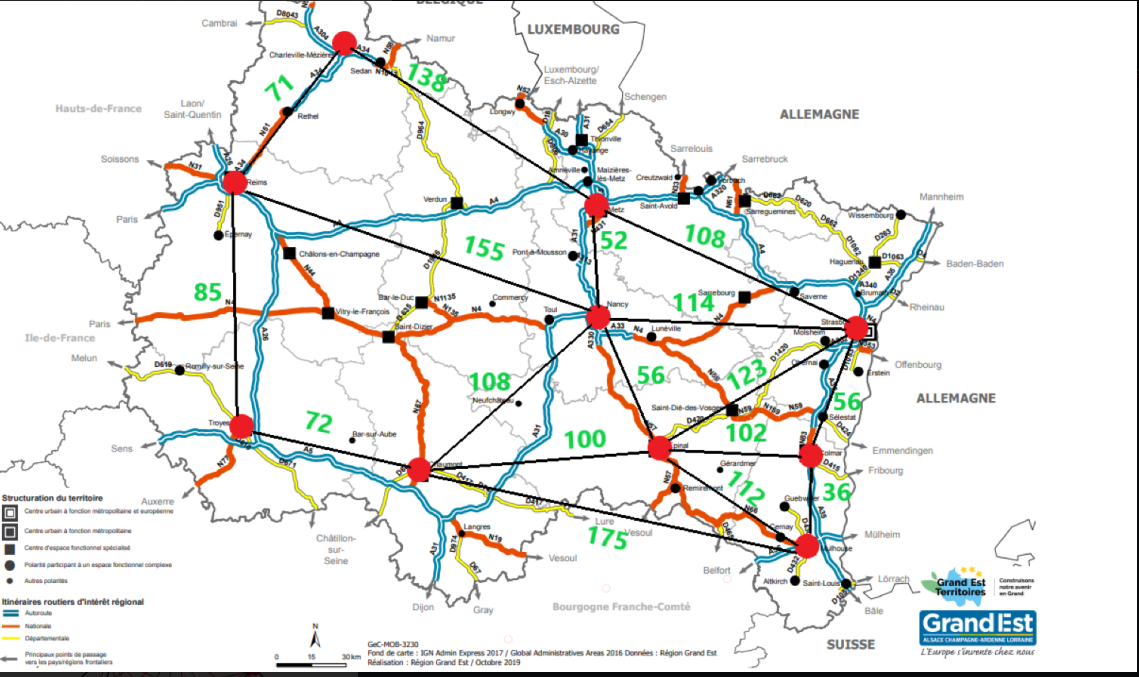

Enfin, nous obtenons le schéma NP-Complet : chaque point est relié aux autres.

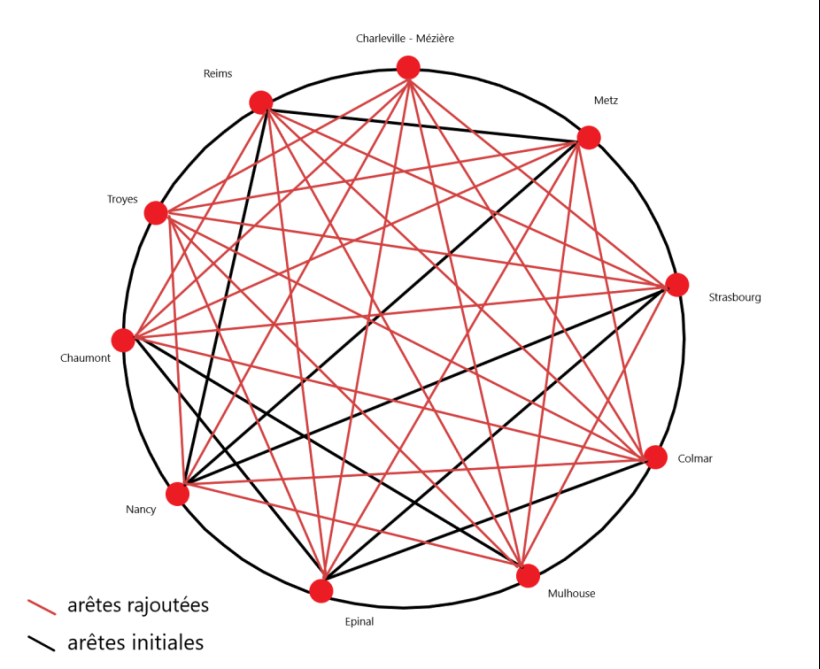

- rajouts des arêtes permettant d'obtenir un graphe complet O(n(n-1))
- rajouts des poids de chaque arêtes O(n(n-1))

Ainsi la complexité étant polynomiale et le voyageur de commerce étant un problème NP-Complet. Notre problème est donc au moins aussi difficile que celui-ci, notre problème est ainsi NP-Complet et par extension NP-Difficile.

## Explication du choix de l'algorithme 

Nous avons alors décidé d'utiliser un algorithme métaheuristique génétique pour résoudre notre problème d’optimisation : trouver le chemin de livraison le plus rapide en respectant les contraintes fixées.
Celui-ci fait partie de la catégorie des algorithmes évolutionnistes. Ces algorithmes sont des méthodes de calcul bio-inspirées. Ils appliquent une forme de théorie de l’évolution sur un problème donnée.
Concrètement, cette famille d’algorithmes va choisir et faire évoluer de manière aléatoire un ensemble de solutions, afin de trouver la solution optimale à un problème donné.

Le but donc de notre algorithme génétique sera de fournir une solution approchée de notre problème d’optimisation dans un temps polynomial et acceptable.
Pour cela, l’algorithme génétique va faire évoluer, par bonds successifs, chacune de nos solutions, contrairement, par exemple, à l'algorithme "branch and bound" qui, lui, fait évoluer seulement des valeurs.

L’algorithme génétique est particulièrement adapté à notre problème d’optimisation. En effet, notre problème n’impose pas de taille maximum, ni de forme de graphe particulière, il n’attend de la solution qu’une résolution suffisamment exacte et rapide.
Étant donné que les métaheuristiques sont des solutions génériques, nous pouvons ne pas trop nous soucier de notre format d’entrée, de plus, le choix de l’algorithme génétique nous permet d’avoir un très grand échantillon de solutions possibles.
Ainsi, peu importe la taille de notre graphe, notre algorithme sera toujours capable de trouver une solution fiable après avoir évalué ces larges échantillons dans leurs ensembles.


## Mise en place des contraintes de notre projet

Pour rappel, nos différentes contraintes sont :
- **k camions disponibles simultanément pour effectuer les livraisons et ensuite rentrer à l'entrepôt :**

Pour cette contrainte, l'algorithme construit un graphe mère optimisé (distance réduite) et le segmente en graphes filles en fonction du nombre de véhicules. Ses graphes filles seront ensuite calculés pour trouver une solution acceptable.

- **Le temps de parcours d’une arrête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic :**

Pour cette contrainte, nous avons modélisé une fonction possédant une variable aléatoire provoquant des "accidents" représentés dans notre projet comme un ralentissement.
Pour cette autre contrainte, nous avons modélisé de manière statique les heures d'affluence du trafic (les heures de bouchon par rapport au graphe ci-dessous). De plus, nous avons implémenté une variable de temps (temps actuel), représentant l'heure actuelle. Ainsi, grâce à la fonction et à la valeur du temps actuel, nous pouvons déterminer si il est dans un temps d'affluence élevée ou normale.

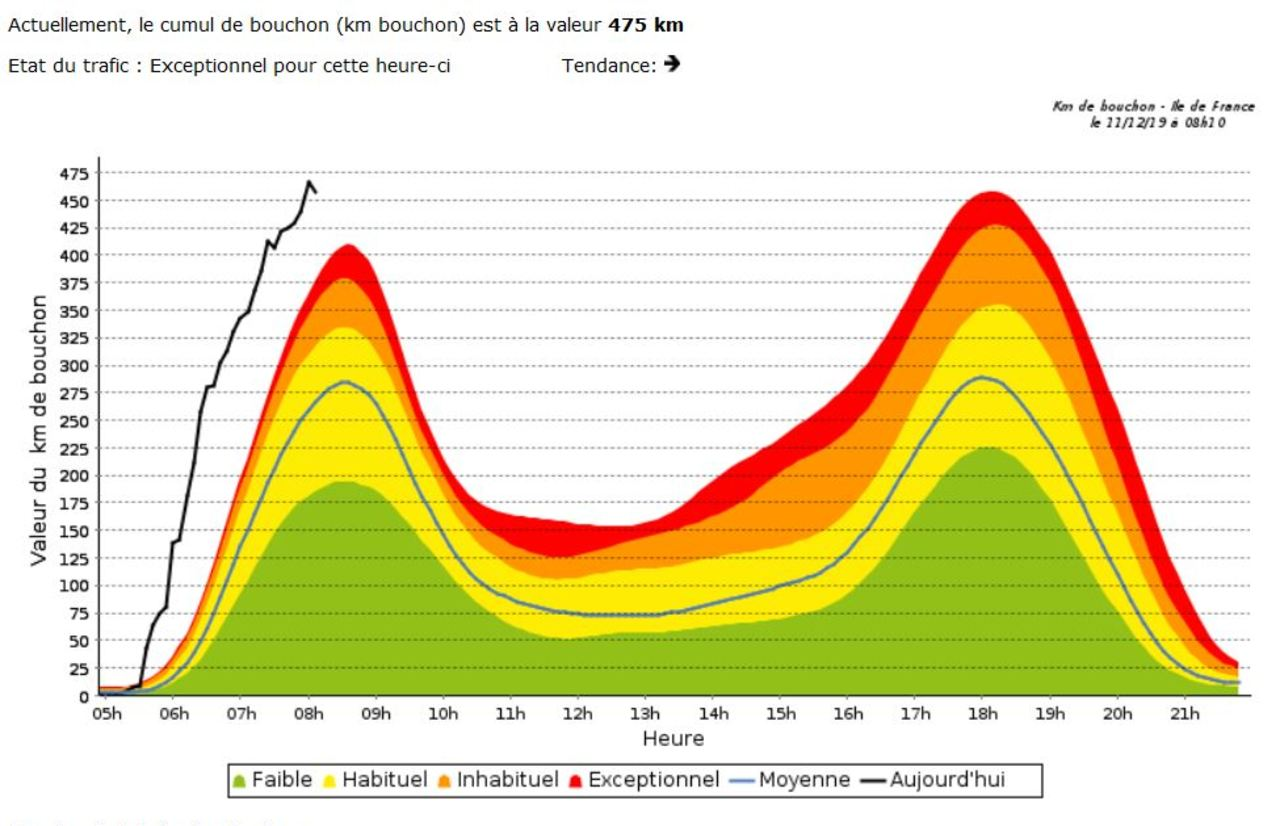

In [1]:
import math
import random

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


def accident():
    if(random.randint(0, 50) == 2):
        return 30
    else:
        return 0
    
def minute_to_time(time,minute):
    return time*60+minute

Time_actuel = minute_to_time(8,0)

def influence(time):
    if(minute_to_time(8,0) < time < minute_to_time(9,30) or minute_to_time(17,0) < time < minute_to_time(18,30)):
        return 40
    else:
        return 0
    
def influence_data():
    return Time_actuel


def influence_sender(time):
    Time_actuel = time
    
    
def vehicule_proccess(gc_mix,nb_vehicule,nb,pop_param,evo_param,printer,mapit,mutation,tournoi):
    Time_actuel = minute_to_time(8,0)
    if(gc_mix.nombreVilles() != 0):
        #on initialise la population avec 50 circuits
        pop = Population(gc_mix, pop_param, True)

        # On fait evoluer notre population sur 100 generations
        ga = GA(gc_mix)
        if(mutation != 0):
            ga.tauxMutation = mutation
        if(tournoi != 0):
            ga.tailleTournoi = tournoi
        pop = ga.evoluerPopulation(pop)
        for i in range(0, evo_param):
            pop = ga.evoluerPopulation(pop)
        
        #on genere une carte représentant notre solution
        meilleurePopulation = pop.getFittest()
            
    
        Time_actuel = Time_actuel + pop.getFittest().getDistance()
        incorp_ville = []
        
        for i in range(gc_mix.nombreVilles()):
            incorp_ville.append(gc_mix.getVille(i))
        borne = borne_inferieur(incorp_ville,0)
        if(printer == 1):
            print("la borne inferieur est : "+ str(borne))

            print("Temps final (sans valeur ajouter) : " + str(pop.getFittest().getDistance()))

        
        lons = []
        lats = []
        noms = []
        for ville in meilleurePopulation.circuit:
            if(printer == 1):
                print(ville.nom)
            lons.append(ville.lon)
            lats.append(ville.lat)
            noms.append(ville.nom)

        lons.append(lons[0])
        lats.append(lats[0])
        noms.append(noms[0])
        if(printer == 1):
            print("//////////////////////////")
        if(mapit == 1):
            map = Basemap(llcrnrlon=3.5,llcrnrlat=46.3,urcrnrlon=9.3,urcrnrlat=51.,
                     resolution='i', projection='tmerc', lat_0 = 48.813549, lon_0 = 3.6664318)

            map.drawmapboundary(fill_color='aqua')
            map.fillcontinents(color='coral',lake_color='aqua')
            map.drawcoastlines()
            map.drawcountries()
            x,y = map(lons,lats)
            map.plot(x,y,'bo', markersize=12)
            for nom,xpt,ypt in zip(noms,x,y):
                plt.text(xpt+5000,ypt+25000,nom)
            color_tm = ['Grey', 'Purple', 'Blue', 'Green', 'Orange', 'Red', 'Cyan', 'Magenta','Yellow','Black','White']
            map.plot(x, y, 'D-', markersize=10, linewidth=2, color=color_tm[nb], markerfacecolor=color_tm[nb])
        return pop.getFittest().getDistance()

## Présentation de l'algorithme génétique

Tout d'abord, comme dit précédemment, l'algorithme génétique s’inspire de la théorie de l’évolution des espèces.

Notre algorithme génétique est constitué de 5 grandes étapes : 

- Création d'une population
- Évaluation de la qualité des individus
- Création/Mutation de nouveaux individus
- Ajout des nouveaux individus dans la population
- Retour à la seconde étape

Cet algorithme a pour but de passer par un ensemble de villes en minimisant la distance totale du trajet. C’est un problème dit NP-complet, ce qui signifie qu’il n’existe pas d’algorithme en temps polynomial permettant de trouver une solution exacte à ce problème.

Nous avons réalisé pour notre algorithme une classe Ville. Cette classe permet de définir les villes selon divers paramètres (coordonnées GPS permettant de calculer la distance et le nom), et une fonction calculant la distance entre deux villes (distance convertie en temps).

In [2]:
class Ville:
    def __init__(self, lon, lat, nom):
        self.lon = lon
        self.lat = lat
        self.nom = nom
        interv_dumb = random.randint(1, 3)
        
        
    def distance(self, ville,time):
        distanceX = (ville.lon-self.lon)*40000*math.cos((self.lat+ville.lat)*math.pi/360)/360
        distanceY = (self.lat-ville.lat)*40000/360
        distance = math.sqrt( (distanceX*distanceX) + (distanceY*distanceY) )
        distance = distance/120*60 + accident() + influence(time)
        return distance
    
    def get_time(self):
        return self.debut_interval
    
    def get_nom(self):
        print(self.nom)


Par la suite, nous utilisons une classe qui permettra de gérer nos différents circuits. Cette classe possède une liste de villes qui sera utilisée lors de la recherche de solution (calcul de distance, génération d'individus...).

In [3]:
class GestionnaireCircuit:
    villesDestinations = []
    
    def interval_selection(self,pre_time, time):
        gc_temp = []
        for ville in self.villesDestinations:
            if(pre_time < ville.get_time() < time):
                gc_temp.append(ville)
        return gc_temp
            
    def ajouterVille(self, ville):
        self.villesDestinations.append(ville)

    def getVille(self, index):
        return self.villesDestinations[index]

    def nombreVilles(self):
        return len(self.villesDestinations)
    
    def clearVille(self):
        self.villesDestinations = []
        
    def enumerator(self):
        for enum in self.villesDestinations:
            print(enum.get_nom())

La classe Circuit utilise le gestionnaire de circuit pour calculer les différents paramètres comme le calcul de la qualité, la génération des individus et le calcul de la distance entre les villes. Cette fonction permet donc d'effectuer les calculs pour la recherche de la solution.

In [4]:
class Circuit:
    def __init__(self, gestionnaireCircuit, circuit=None):
        self.gestionnaireCircuit = gestionnaireCircuit
        self.circuit = []
        self.fitness = 0.0
        self.distance = 0
        if circuit is not None:
            self.circuit = circuit
        else:
            for i in range(0, self.gestionnaireCircuit.nombreVilles()):
                self.circuit.append(None)

                
    def enumerator(self):
        for enum in self.gestionnaireCircuit.villesDestinations:
            print(enum.get_nom())
    
    def __len__(self):
        return len(self.circuit)

    def __getitem__(self, index):
        return self.circuit[index]

    def __setitem__(self, key, value):
        self.circuit[key] = value

    def genererIndividu(self):
        for indiceVille in range(0, self.gestionnaireCircuit.nombreVilles()):
            self.setVille(indiceVille, self.gestionnaireCircuit.getVille(indiceVille))
        random.shuffle(self.circuit)

    def getVille(self, circuitPosition):
        return self.circuit[circuitPosition]

    def setVille(self, circuitPosition, ville):
        self.circuit[circuitPosition] = ville
        self.fitness = 0.0
        self.distance = 0

    def getFitness(self):
        if self.fitness == 0:
            self.fitness = 1/float(self.getDistance())
        return self.fitness

    def getDistance(self):
        if self.distance == 0:
            Timer_safer = influence_data()
            Timer_changer = Timer_safer
            circuitDistance = 0
            for indiceVille in range(0, self.tailleCircuit()):
                villeOrigine = self.getVille(indiceVille)
                villeArrivee = None
                if indiceVille+1 < self.tailleCircuit():
                    villeArrivee = self.getVille(indiceVille+1)
                    dist = villeOrigine.distance(villeArrivee,Timer_changer)
                    Timer_changer = Timer_changer + dist
                else:
                    villeArrivee = self.getVille(0)
                    dist = villeOrigine.distance(villeArrivee,Timer_changer)
                    Timer_changer = Timer_changer + dist
                circuitDistance += dist
            self.distance = circuitDistance
        return self.distance

    def tailleCircuit(self):
        return len(self.circuit)

    def contientVille(self, ville):
        return ville in self.circuit


La classe Population permet d'initialiser les populations. Elle a pour principal objectif de retourner le circuit ayant la meilleure qualité (distance la plus faible).

In [5]:
class Population:
    def __init__(self, gestionnaireCircuit, taillePopulation, init):
        self.circuits = []
        for i in range(0, taillePopulation):
            self.circuits.append(None)

        if init:
            for i in range(0, taillePopulation):
                nouveauCircuit = Circuit(gestionnaireCircuit)
                nouveauCircuit.genererIndividu()
                self.sauvegarderCircuit(i, nouveauCircuit)

    def __setitem__(self, key, value):
        self.circuits[key] = value

    def __getitem__(self, index):
        return self.circuits[index]

    def sauvegarderCircuit(self, index, circuit):
        self.circuits[index] = circuit

    def getCircuit(self, index):
        return self.circuits[index]

    def getFittest(self):
        fittest = self.circuits[0]
        for i in range(0, self.taillePopulation()):
            if fittest.getFitness() <= self.getCircuit(i).getFitness():
                fittest = self.getCircuit(i)
        return fittest

    def taillePopulation(self):
        return len(self.circuits)


La classe GA (Genetic Algorithm) contient les étapes de notre algorithme génétique :

- L'évolution de la population - **evoluerPopulation()**
- La création de l'enfant - **crossover()**
- Les mutations - **muter()**
- La sélection des individus à reproduire - **selectionTournoi()**

In [6]:
class GA:
    def __init__(self, gestionnaireCircuit):
        self.gestionnaireCircuit = gestionnaireCircuit
        self.tauxMutation = 0.015
        self.tailleTournoi = 5
        self.elitisme = True

    def evoluerPopulation(self, pop):
        nouvellePopulation = Population(self.gestionnaireCircuit, pop.taillePopulation(), False)
        elitismeOffset = 0
        if self.elitisme:
            nouvellePopulation.sauvegarderCircuit(0, pop.getFittest())
            elitismeOffset = 1

        for i in range(elitismeOffset, nouvellePopulation.taillePopulation()):
            parent1 = self.selectionTournoi(pop)
            parent2 = self.selectionTournoi(pop)
            enfant = self.crossover(parent1, parent2)
            nouvellePopulation.sauvegarderCircuit(i, enfant)

        for i in range(elitismeOffset, nouvellePopulation.taillePopulation()):
            self.muter(nouvellePopulation.getCircuit(i))

        return nouvellePopulation

    def crossover(self, parent1, parent2):
        enfant = Circuit(self.gestionnaireCircuit)

        startPos = int(random.random() * parent1.tailleCircuit())
        endPos = int(random.random() * parent1.tailleCircuit())

        for i in range(0, enfant.tailleCircuit()):
            if startPos < endPos and i > startPos and i < endPos:
                enfant.setVille(i, parent1.getVille(i))
            elif startPos > endPos:
                if not (i < startPos and i > endPos):
                    enfant.setVille(i, parent1.getVille(i))

        for i in range(0, parent2.tailleCircuit()):
            if not enfant.contientVille(parent2.getVille(i)):
                for ii in range(0, enfant.tailleCircuit()):
                    if enfant.getVille(ii) == None:
                        enfant.setVille(ii, parent2.getVille(i))
                        break

        return enfant

    def muter(self, circuit):
        for circuitPos1 in range(0, circuit.tailleCircuit()):
            if random.random() < self.tauxMutation:
                circuitPos2 = int(circuit.tailleCircuit() * random.random())
                
                ville1 = circuit.getVille(circuitPos1)
                ville2 = circuit.getVille(circuitPos2)

                circuit.setVille(circuitPos2, ville1)
                circuit.setVille(circuitPos1, ville2)

    def selectionTournoi(self, pop):
        tournoi = Population(self.gestionnaireCircuit, self.tailleTournoi, False)
        for i in range(0, self.tailleTournoi):
            randomId = int(random.random() * pop.taillePopulation())
            tournoi.sauvegarderCircuit(i, pop.getCircuit(randomId))
        fittest = tournoi.getFittest()
        return fittest

De manière plus précise, nous allons parler des différentes variables :

- **tauxMutation** représente la probabilité qu'une ville d'un circuit mute (inversion de la position de deux villes).
- **tailleTournoi** correspond à la taille des adversaires dans le tournoi. Le tournoi permet de sélectionner les individus que nous souhaitons faire se reproduire.
- **elitisme** est le fait de conserver les meilleurs individus d’une génération à une autre. Cela permet d'accélérer la convergence de l'algorithme au détriment de la diversité des individus. Dans notre cas, l'élitisme est représenté avec un nombre n d’individus égal à 1.

Dans notre algorithme, la reproduction est représentée par un mélange de deux circuits. De plus, nous devons implémenter une contrainte : le circuit doit contenir toutes les villes possibles. Pour pallier à ce problème, nous procédons de la manière suivante :

- On choisit deux indices.
- On recopie les villes présentes entre ces deux indices dans notre futur individu.
- On complète les emplacements vides de notre nouvel individu par les villes manquantes.


## Résolution du problème

ville de base :Chaumont
la borne inferieur est : 213.94507802405394
Temps final (sans valeur ajouter) : 213.94507802405394
Strasbourg
Chaumont
Colmar
//////////////////////////
la borne inferieur est : 205.33011968541922
Temps final (sans valeur ajouter) : 235.33011968541922
Mulhouse
Chaumont
Nancy
Epinal
//////////////////////////
la borne inferieur est : 247.16843515380086
Temps final (sans valeur ajouter) : 277.16843515380083
Metz
Reims
Charleville
Troyes
Chaumont
//////////////////////////


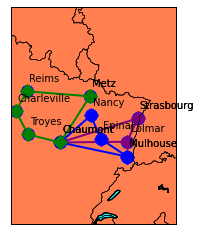

In [8]:
def AlgoGA(aleatoire,iter_max,printer):
    gc = GestionnaireCircuit()
    gc.clearVille()
    nb_vehicule = 3

    if(aleatoire == 0):
        #on cree nos villes
        ville1 = Ville(4.031926, 49.2577886, 'Reims')
        gc.ajouterVille(ville1)
        ville2 = Ville(4.0746257, 48.2971626, 'Troyes')
        gc.ajouterVille(ville2)
        ville3 = Ville(5.1395849, 48.1111324, 'Chaumont')
        gc.ajouterVille(ville3)
        ville4 = Ville(6.1834097, 48.6937223, 'Nancy')
        gc.ajouterVille(ville4)
        ville5 = Ville(6.4910099, 48.1637433, 'Epinal')
        gc.ajouterVille(ville5)
        ville6 = Ville(7.3389937, 47.7467233, 'Mulhouse')
        gc.ajouterVille(ville6)
        ville7 = Ville(7.7507127, 48.584614, 'Strasbourg')
        gc.ajouterVille(ville7)
        ville8 = Ville(6.1763552, 49.1196964, 'Metz')
        gc.ajouterVille(ville8)
        ville9 = Ville(7.3579641, 48.0777517, 'Colmar')
        gc.ajouterVille(ville9)
        ville10 = Ville(3.6664318, 48.813549, 'Charleville')
        gc.ajouterVille(ville10)

    else : 
        for i in range(iter_max):
            ville1 = Ville(random.uniform(3.0, 7.9), random.uniform(47.0, 49.9), 'P'+str(i))
            gc.ajouterVille(ville1)

    Time_actuel = minute_to_time(15,0)
    count = 0
    if(gc.nombreVilles() != 0):

        #on initialise la population avec 50 circuits
        pop = Population(gc, 100, True)

        # On fait evoluer notre population sur 100 generations
        ga = GA(gc)
        pop = ga.evoluerPopulation(pop)
        for i in range(0, 100):
            pop = ga.evoluerPopulation(pop)


        #on genere une carte représentant notre solution
        meilleurePopulation = pop.getFittest()
        seperateur = int((gc.nombreVilles()/nb_vehicule))

        remise = 1
        stater = 0
        gc_mix = GestionnaireCircuit()
        for ville in meilleurePopulation.circuit:
            if(stater == 0):
                stater = 1
                mere_ville = ville
                if(printer == 1):
                    print("ville de base :"+ str(mere_ville.nom))
            count = 1 + count
            gc_mix.ajouterVille(ville)
            if(count == seperateur and remise != nb_vehicule):
                count = 0
                remise += 1
                if(stater == 2):
                    gc_mix.ajouterVille(mere_ville)
                if(stater == 1):
                    stater = 2
                vehicule_proccess(gc_mix,nb_vehicule,remise-1,100,100,printer,printer,0,0)
                gc_mix.clearVille()
        gc_mix.ajouterVille(mere_ville)
        vehicule_proccess(gc_mix,nb_vehicule,remise,100,100,printer,printer,0,0)

    plt.show()
    
AlgoGA(0,50,1)

## Étude Expérimentale

Cette partie représente le comportement expérimental de notre algorithme. Il permettra de démontrer les performances de notre algorithme, ses limites et les perspectives d'amélioration.

Tout d'abord, nous allons déterminer la fonction de la borne inférieure utilisant un solveur. Un solveur permet de résoudre un problème d’optimisation. Une fois le problème ainsi défini (ici le problème TSP), l’optimisation se fait grâce à notre fonction utilisant notre solveur, c’est-à-dire un algorithme d’optimisation. Dans notre cas, notre solveur permet la résolution de problème linéaire. Il prend en paramètre la liste des villes à étudier et la transforme en un graphe complet de distance grâce aux fonctions de calcul :

- **ville_distance_matrix()** permet de calculer la distance entre deux villes.
- **calculator_distance()** permet de créer la matrice représentant le graphe complet des distances.

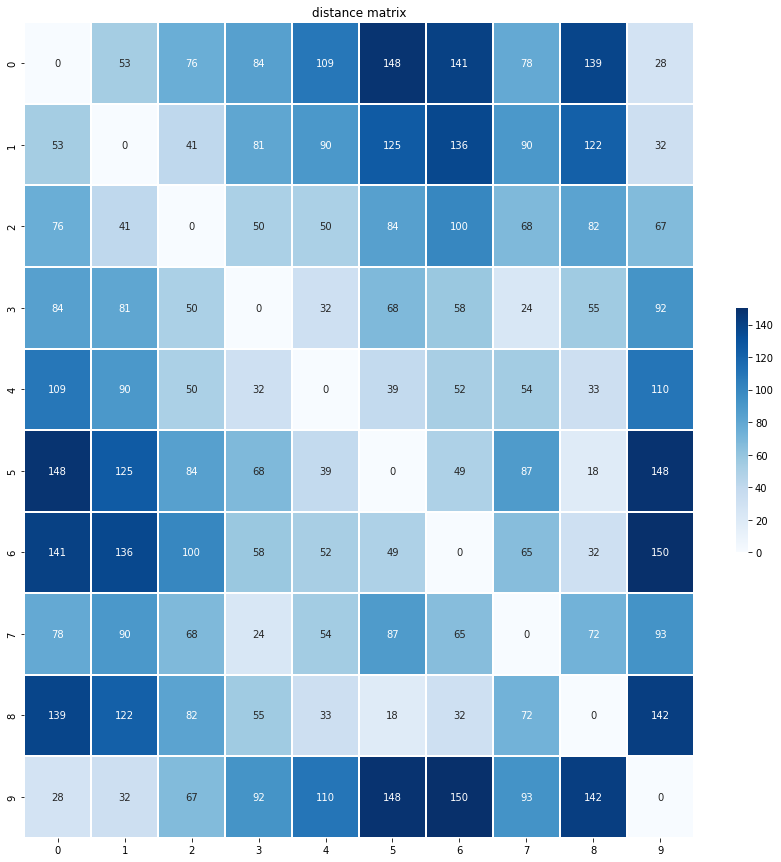

Notre solveur prend le problème de minimisation, il instancie comme variable toutes les possibilités entre deux villes, et prend comme fonction objective toutes les possibilités des distances entre deux villes.

Les contraintes sont :

- La contrainte de distance nulle sur les distances calculées entre la même ville.
- La contrainte de passage qui se traduit par le passage de tous les points.

In [7]:
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import itertools
import numpy as np
import pulp


def ville_distance_matrix(ville2, ville):
      distanceX = (ville.lon-ville2.lon)*40000*math.cos((ville2.lat+ville.lat)*math.pi/360)/360
      distanceY = (ville2.lat-ville.lat)*40000/360
      distance = math.sqrt( (distanceX*distanceX) + (distanceY*distanceY) )
      distance = distance/120*60
      return distance
    
    
def calculator_distance(incorp_ville):
    tab = []
    tmp_tab = []
    for i in range(len(incorp_ville)):
        for k in range(len(incorp_ville)):
            if(i != k):
                tmp_tab.append(ville_distance_matrix(incorp_ville[i],incorp_ville[k]))
            else:
                tmp_tab.append(0)
        tab.append(tmp_tab)
        tmp_tab = []
    return tab
            


def borne_inferieur(incorp_ville,state):
    n_point = len(incorp_ville)

    distances = pd.DataFrame(calculator_distance(incorp_ville))
    
    if(state == 1):
        fig, ax = plt.subplots(figsize=(15, 15))
        sns.heatmap(distances, ax=ax, cmap='Blues', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1)
        plt.title('distance matrix')
        plt.show()
    # set problem
    problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)


    # set variables
    x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
    u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

    # set objective function
    problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

    # set constrains
    for i in range(n_point):
        problem += x[i, i] == 0

    for i in range(n_point):
        problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
        problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

    # eliminate subtour
    for i in range(n_point):
        for j in range(n_point):
            if i != j and (i != 0 and j != 0):
                problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

    # solve problem
    status = problem.solve()

    # output status, value of objective function
    status, pulp.LpStatus[status], pulp.value(problem.objective)
    return pulp.value(problem.objective)



Voici la fonction permettant d'étudier la similarité entre la borne inférieure et les résultats que retourne notre algorithme.
Ici, nous pouvons voir que le résultat ayant pour paramètre un graphe aléatoire et un nombre d'itération de 10, provoque un résultat se rapprochant énormément de l'optimum global.

IntProgress(value=0, layout=Layout(width='100%'), max=10)

terminer


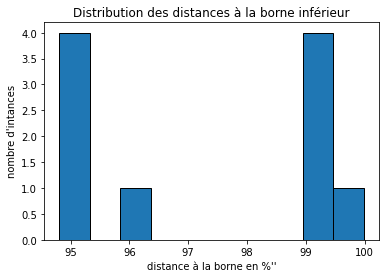

In [9]:
from collections import deque
from ipywidgets import IntProgress
from IPython.display import display


def extract_gc_to_tab(gc_tmp):
    incorp_ville = []
    for i in range(gc_tmp.nombreVilles()):
        incorp_ville.append(gc_tmp.getVille(i))
    return incorp_ville

def etude2(iter_max,aleatoire,sender):
    gc = GestionnaireCircuit()
    gc.clearVille()
    nb_vehicule = 3
    bornes = deque(())

    if(aleatoire == 0):
        #on cree nos villes
        ville1 = Ville(4.031926, 49.2577886, 'Reims')
        gc.ajouterVille(ville1)
        ville2 = Ville(4.0746257, 48.2971626, 'Troyes')
        gc.ajouterVille(ville2)
        ville3 = Ville(5.1395849, 48.1111324, 'Chaumont')
        gc.ajouterVille(ville3)
        ville4 = Ville(6.1834097, 48.6937223, 'Nancy')
        gc.ajouterVille(ville4)
        ville5 = Ville(6.4910099, 48.1637433, 'Epinal')
        gc.ajouterVille(ville5)
        ville6 = Ville(7.3389937, 47.7467233, 'Mulhouse')
        gc.ajouterVille(ville6)
        ville7 = Ville(7.7507127, 48.584614, 'Strasbourg')
        gc.ajouterVille(ville7)
        ville8 = Ville(6.1763552, 49.1196964, 'Metz')
        gc.ajouterVille(ville8)
        ville9 = Ville(7.3579641, 48.0777517, 'Colmar')
        gc.ajouterVille(ville9)
        ville10 = Ville(3.6664318, 48.813549, 'Charleville')
        gc.ajouterVille(ville10)

    else : 
        for i in range(iter_max):
            ville1 = Ville(random.uniform(3.0, 7.9), random.uniform(47.0, 49.9), 'P'+str(i))
            gc.ajouterVille(ville1)

    Time_actuel = minute_to_time(15,0)
    bar = IntProgress(min=0, max=iter_max, layout={"width" : "100%"})
    display(bar)
    
    gc_mix = GestionnaireCircuit()
    for _ in range(iter_max):
        if(gc.nombreVilles() != 0):

            #on initialise la population avec 50 circuits
            pop = Population(gc, 100, True)

            # On fait evoluer notre population sur 100 generations
            ga = GA(gc)
            pop = ga.evoluerPopulation(pop)
            for i in range(0, 100):
                pop = ga.evoluerPopulation(pop)


            #on genere une carte représentant notre solution
            meilleurePopulation = pop.getFittest()
            seperateur = int((gc.nombreVilles()/nb_vehicule))
            soluce = 0
            remise = 1
            stater = 0
            count = 0
            borne = 0
            
            gc_mix.clearVille()
                 
            for ville in meilleurePopulation.circuit:
                if(stater == 0):
                    stater = 1
                    mere_ville = ville
                count = 1 + count
                gc_mix.ajouterVille(ville)
                if(count == seperateur and remise != nb_vehicule):
                    count = 0
                    remise += 1
                    if(stater == 2):
                        gc_mix.ajouterVille(mere_ville)
                    if(stater == 1):
                        stater = 2
                    soluce += vehicule_proccess(gc_mix,nb_vehicule,remise-1,100,100,0,0,0,0)
                   
                    if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                        borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                    gc_mix.clearVille()
            gc_mix.ajouterVille(mere_ville)
            soluce += vehicule_proccess(gc_mix,nb_vehicule,remise,100,100,0,0,0,0)
            if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
            gc_mix.clearVille()
            
            
            
                
            distance = borne*100/soluce
            bornes.append(distance)
            bar.value += 1

    bar.close()
    if(sender == 0):
        plt.hist(bornes, edgecolor = "black")                         
        plt.xlabel("distance à la borne en %''")                             
        plt.ylabel("nombre d'intances")                               
        plt.title("Distribution des distances à la borne inférieur")
        print("terminer")
    
    if(sender == 1):
        return bornes
    

etude2(10,1,0)

Voici la fonction permettant d'étudier l'impact de la taille de la population initiale sur la qualité des solutions entre la borne inférieure et les résultats que sretourne notre algorithme. Ici, nous pouvons voir que le résultat ayant pour paramètre plusieurs graphes aléatoires et un nombre d'itération de l'algorithme et une répétition avec incrémentation de la population initiale, provoque un résultat se rapprochant de l'optimum global.

Le graphe produit permet de visualiser le résultat selon l'écart-type et la moyenne (environ 97 % de l'optimum global). Il démontre la fiabilité de notre algorithme selon ses paramètres qui reste assez stable.

IntProgress(value=0, layout=Layout(width='100%'), max=200)

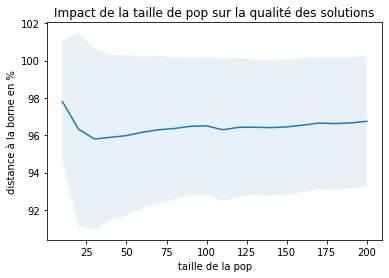

terminer


In [10]:
import numpy as np

def etude3(rep,iter_max,aleatoire,sender):
    
    nb_vehicule = 3
    bornes = deque(())
    moyennes   = []
    deviations = []
    inter = []

    Time_actuel = minute_to_time(8,0)
    bar = IntProgress(min=0, max=iter_max*rep, layout={"width" : "100%"})
    display(bar)
    
    gc_mix = GestionnaireCircuit()
    for interval in range(rep):
        inter.append(10+10*interval)
        for _ in range(iter_max):
            
            gc = GestionnaireCircuit()
            gc.clearVille()
            
            for i in range(iter_max):
                ville1 = Ville(random.uniform(3.0, 7.9), random.uniform(47.0, 49.9), 'P'+str(i))
                gc.ajouterVille(ville1)

            if(gc.nombreVilles() != 0):

                #on initialise la population avec 50 circuits
                pop = Population(gc, 10+10*interval, True)

                # On fait evoluer notre population sur 100 generations
                ga = GA(gc)
                pop = ga.evoluerPopulation(pop)
                for i in range(0, 100):
                    pop = ga.evoluerPopulation(pop)


                #on genere une carte représentant notre solution
                meilleurePopulation = pop.getFittest()
                seperateur = int((gc.nombreVilles()/nb_vehicule))
                soluce = 0
                remise = 1
                stater = 0
                count = 0
                borne = 0

                gc_mix.clearVille()

                for ville in meilleurePopulation.circuit:
                    if(stater == 0):
                        stater = 1
                        mere_ville = ville
                    count = 1 + count
                    gc_mix.ajouterVille(ville)
                    if(count == seperateur and remise != nb_vehicule):
                        count = 0
                        remise += 1
                        if(stater == 2):
                            gc_mix.ajouterVille(mere_ville)
                        if(stater == 1):
                            stater = 2
                        soluce += vehicule_proccess(gc_mix,nb_vehicule,remise-1,10+10*interval,100,0,0,0,0)

                        if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                            borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                        gc_mix.clearVille()
                gc_mix.ajouterVille(mere_ville)
                soluce += vehicule_proccess(gc_mix,nb_vehicule,remise,10+10*interval,100,0,0,0,0)
                if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                    borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                gc_mix.clearVille()

                distance = borne*100/soluce
                bornes.append(distance)
                bar.value += 1
                
        moyennes.append(np.mean(bornes))
        deviations.append(np.std(bornes))
        
    bar.close()
    if(sender == 0):
        # affichage de la courbe de moyenne
        plt.plot(inter, moyennes)

        # affichage de la bande d'écart-type
        plt.fill_between(inter,
                         np.subtract(moyennes, deviations), # borne haute
                         np.add(moyennes, deviations),      # borne basse
                         alpha=.1)                          # transparence
        plt.xlabel("taille de la pop")
        plt.ylabel("distance à la borne en %")
        plt.title("Impact de la taille de pop sur la qualité des solutions")
        plt.show()
        print("terminer")
    
    if(sender == 1):
        return bornes



etude3(20,10,1,0)

Voici la fonction permettant d'étudier l'impact de la taille de l'évolution de la population sur la qualité des solutions entre la borne inférieure et les résultats que retourne notre algorithme. Ici, nous pouvons voir les mêmes paramètres que détaillés précédemment.

Le graphe produit est similaire au graphe précédent et démontre bien la fiabilité de notre algorithme.

IntProgress(value=0, layout=Layout(width='100%'), max=50)

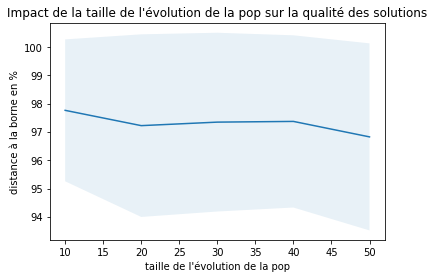

terminer


In [11]:
import numpy as np

def etude4(rep,iter_max,aleatoire,sender):
    
    nb_vehicule = 3
    bornes = deque(())
    moyennes   = []
    deviations = []
    inter = []

    Time_actuel = minute_to_time(8,0)
    bar = IntProgress(min=0, max=iter_max*rep, layout={"width" : "100%"})
    display(bar)
    
    gc_mix = GestionnaireCircuit()
    for interval in range(rep):
        inter.append(10+10*interval)
        for _ in range(iter_max):
            
            gc = GestionnaireCircuit()
            gc.clearVille()
            
            for i in range(iter_max):
                ville1 = Ville(random.uniform(3.0, 7.9), random.uniform(47.0, 49.9), 'P'+str(i))
                gc.ajouterVille(ville1)

            if(gc.nombreVilles() != 0):

                #on initialise la population avec 100 circuits
                pop = Population(gc, 100, True)

                # On fait evoluer notre population sur 100 generations
                ga = GA(gc)
                pop = ga.evoluerPopulation(pop)
                for i in range(0, 10+10*interval):
                    pop = ga.evoluerPopulation(pop)


                #on genere une carte représentant notre solution
                meilleurePopulation = pop.getFittest()
                seperateur = int((gc.nombreVilles()/nb_vehicule))
                soluce = 0
                remise = 1
                stater = 0
                count = 0
                borne = 0

                gc_mix.clearVille()

                for ville in meilleurePopulation.circuit:
                    if(stater == 0):
                        stater = 1
                        mere_ville = ville
                    count = 1 + count
                    gc_mix.ajouterVille(ville)
                    if(count == seperateur and remise != nb_vehicule):
                        count = 0
                        remise += 1
                        if(stater == 2):
                            gc_mix.ajouterVille(mere_ville)
                        if(stater == 1):
                            stater = 2
                        soluce += vehicule_proccess(gc_mix,nb_vehicule,remise-1,100,10+10*interval,0,0,0,0)

                        if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                            borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                        gc_mix.clearVille()
                gc_mix.ajouterVille(mere_ville)
                soluce += vehicule_proccess(gc_mix,nb_vehicule,remise,100,10+10*interval,0,0,0,0)
                if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                    borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                gc_mix.clearVille()

                distance = borne*100/soluce
                bornes.append(distance)
                bar.value += 1
                
        moyennes.append(np.mean(bornes))
        deviations.append(np.std(bornes))
        
    bar.close()
    if(sender == 0):
        # affichage de la courbe de moyenne
        plt.plot(inter, moyennes)

        # affichage de la bande d'écart-type
        plt.fill_between(inter,
                         np.subtract(moyennes, deviations), # borne haute
                         np.add(moyennes, deviations),      # borne basse
                         alpha=.1)                          # transparence
        plt.xlabel("taille de l'évolution de la pop")
        plt.ylabel("distance à la borne en %")
        plt.title("Impact de la taille de l'évolution de la pop sur la qualité des solutions")
        plt.show()
        print("terminer")
    
    if(sender == 1):
        return bornes
    
    

etude4(5,10,1,0)

Voici la fonction permettant d'étudier l'impact de la taille de l'évolution de la population et la taille de l'évolution de la population sur la qualité des solutions entre la borne inférieure et les résultats que retourne notre algorithme. Ici, nous pouvons voir les mêmes paramètres que détaillés précédemment du fait que ce soit la fusion des fonctions précédentes.

Le graphe produit montre une courbe croissante proportionnelle aux paramètres.

IntProgress(value=0, layout=Layout(width='100%'), max=20)

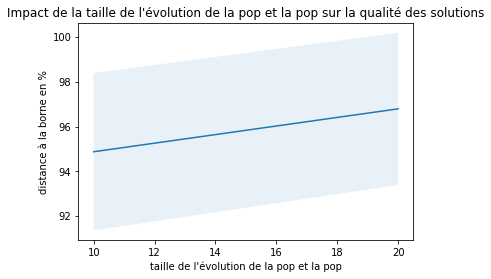

In [14]:
import numpy as np

def etude5(rep,iter_max,iter_rep,aleatoire,sender):
    
    nb_vehicule = 3
    bornes = deque(())
    moyennes   = []
    deviations = []
    inter = []

    Time_actuel = minute_to_time(8,0)
    bar = IntProgress(min=0, max=iter_max*rep, layout={"width" : "100%"})
    display(bar)
    
    gc_mix = GestionnaireCircuit()
    for interval in range(rep):
        inter.append(10+10*interval)
        for _ in range(iter_rep):
            
            gc = GestionnaireCircuit()
            gc.clearVille()
            
            for i in range(iter_max):
                ville1 = Ville(random.uniform(3.0, 7.9), random.uniform(47.0, 49.9), 'P'+str(i))
                gc.ajouterVille(ville1)

            if(gc.nombreVilles() != 0):

                #on initialise la population avec 100 circuits
                pop = Population(gc, 10+10*interval, True)

                # On fait evoluer notre population sur 100 generations
                ga = GA(gc)
                pop = ga.evoluerPopulation(pop)
                for i in range(0, 10+10*interval):
                    pop = ga.evoluerPopulation(pop)


                #on genere une carte représentant notre solution
                meilleurePopulation = pop.getFittest()
                seperateur = int((gc.nombreVilles()/nb_vehicule))
                soluce = 0
                remise = 1
                stater = 0
                count = 0
                borne = 0

                gc_mix.clearVille()

                for ville in meilleurePopulation.circuit:
                    if(stater == 0):
                        stater = 1
                        mere_ville = ville
                    count = 1 + count
                    gc_mix.ajouterVille(ville)
                    if(count == seperateur and remise != nb_vehicule):
                        count = 0
                        remise += 1
                        if(stater == 2):
                            gc_mix.ajouterVille(mere_ville)
                        if(stater == 1):
                            stater = 2
                        soluce += vehicule_proccess(gc_mix,nb_vehicule,remise-1,10+10*interval,10+10*interval,0,0,0,0)

                        if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                            borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                        gc_mix.clearVille()
                gc_mix.ajouterVille(mere_ville)
                soluce += vehicule_proccess(gc_mix,nb_vehicule,remise,10+10*interval,10+10*interval,0,0,0,0)
                if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                    borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                gc_mix.clearVille()

                distance = borne*100/soluce
                bornes.append(distance)
                bar.value += 1
                
        moyennes.append(np.mean(bornes))
        deviations.append(np.std(bornes))
        
    bar.close()
    if(sender == 0):
        # affichage de la courbe de moyenne
        plt.plot(inter, moyennes)

        # affichage de la bande d'écart-type
        plt.fill_between(inter,
                         np.subtract(moyennes, deviations), # borne haute
                         np.add(moyennes, deviations),      # borne basse
                         alpha=.1)                          # transparence
        plt.xlabel("taille de l'évolution de la pop et la pop")
        plt.ylabel("distance à la borne en %")
        plt.title("Impact de la taille de l'évolution de la pop et la pop sur la qualité des solutions")
        plt.show()
    
    if(sender == 1):
        return bornes
    

etude5(2,10,10,1,0)

Le prochain graphique nous montre l’impact de la taille du nombre de véhicules sur la qualité des solutions.
Le bleu clair représente l’écart-type et la ligne foncée la moyenne de la qualité des solutions.
On peut voir que le nombre de véhicules n’influe pas sur la qualité de la solution. L’algorithme découpant de manières égales le graphe en segment, il est ensuite aisé de les distribuer a X véhicules.

IntProgress(value=0, layout=Layout(width='100%'), max=20)

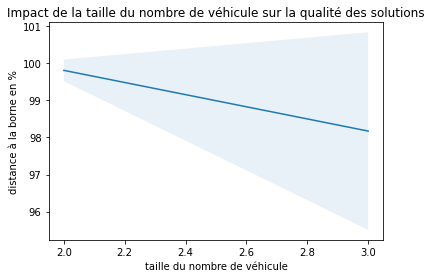

terminer


In [15]:
import numpy as np
from collections import deque
from ipywidgets import IntProgress
from IPython.display import display

def etude6(rep,iter_max,aleatoire,sender):
    
    nb_vehicule = 1
    bornes = deque(())
    moyennes   = []
    deviations = []
    inter = []
    
    Time_actuel = minute_to_time(8,0)
    bar = IntProgress(min=0, max=iter_max*rep, layout={"width" : "100%"})
    display(bar)
    
    gc = GestionnaireCircuit()
    gc.clearVille()

    for i in range(iter_max):
        ville1 = Ville(random.uniform(3.0, 7.9), random.uniform(47.0, 49.9), 'P'+str(i))
        gc.ajouterVille(ville1)
    
    for interval in range(rep):
        inter.append(interval+2)
        nb_vehicule = interval+2
        for _ in range(iter_max):

            if(gc.nombreVilles() != 0):

                #on initialise la population avec 100 circuits
                pop = Population(gc, 100, True)

                # On fait evoluer notre population sur 100 generations
                ga = GA(gc)
                pop = ga.evoluerPopulation(pop)
                for i in range(0, 100):
                    pop = ga.evoluerPopulation(pop)


                #on genere une carte représentant notre solution
                meilleurePopulation = pop.getFittest()
                seperateur = int((gc.nombreVilles()/nb_vehicule))
                soluce = 0
                remise = 1
                stater = 0
                count = 0
                borne = 0
                
                gc_mix = GestionnaireCircuit()
                gc_mix.clearVille()

                for ville in meilleurePopulation.circuit:
                    if(stater == 0):
                        stater = 1
                        mere_ville = ville
                    count = 1 + count
                    gc_mix.ajouterVille(ville)
                    if(count == seperateur and remise != nb_vehicule):
                        count = 0
                        remise += 1
                        if(stater == 2):
                            gc_mix.ajouterVille(mere_ville)
                        if(stater == 1):
                            stater = 2
                        soluce += vehicule_proccess(gc_mix,nb_vehicule,remise-1,100,100,0,0,0,0)

                        if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                            borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                        gc_mix.clearVille()
                gc_mix.ajouterVille(mere_ville)
                soluce += vehicule_proccess(gc_mix,nb_vehicule,remise,100,100,0,0,0,0)
                if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                    borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                gc_mix.clearVille()

                distance = borne*100/soluce
                bornes.append(distance)
                bar.value += 1
                
        moyennes.append(np.mean(bornes))
        deviations.append(np.std(bornes))
        
    bar.close()
    if(sender == 0):
        # affichage de la courbe de moyenne
        plt.plot(inter, moyennes)

        # affichage de la bande d'écart-type
        plt.fill_between(inter,
                         np.subtract(moyennes, deviations), # borne haute
                         np.add(moyennes, deviations),      # borne basse
                         alpha=.1)                          # transparence
        plt.xlabel("taille du nombre de véhicule")
        plt.ylabel("distance à la borne en %")
        plt.title("Impact de la taille du nombre de véhicule sur la qualité des solutions")
        plt.show()
        print("terminer")
    
    if(sender == 1):
        return bornes


etude6(2,10,1,0)

Le prochain graphique nous montre le taux de mutation ou nombre de participants à la distance à la borne afin d’en déduire l’impact sur notre solution. 
Le nuage bleu autour de la ligne bleu foncé représente l’écart-type de cet impact et la ligne la moyenne des résultats. On peut ainsi constater qu’à partir du moment ou des mutations ont lieu, la qualité de la solution baisse légèrement jusqu’à 1% de mutation, moment à partir duquel la qualité de la solution remonte légèrement. Le choix de paramètre entre le taux de mutation et le nombre de participants du tournoi sont initialisés lors du lancement de la fonction selon le paramètre en entrée "muta_state".

In [19]:
import numpy as np
from collections import deque
from ipywidgets import IntProgress
from IPython.display import display


def etude7(rep,iter_max,aleatoire,sender,muta_state,iter_rep):
    nb_vehicule = 3
    bornes = deque(())
    moyennes   = []
    deviations = []
    inter = []
    
    Time_actuel = minute_to_time(8,0)
    bar = IntProgress(min=0, max=iter_max*rep, layout={"width" : "100%"})
    display(bar)
    
    gc = GestionnaireCircuit()
    gc.clearVille()

    for i in range(iter_max):
        ville1 = Ville(random.uniform(3.0, 7.9), random.uniform(47.0, 49.9), 'P'+str(i))
        gc.ajouterVille(ville1)
    
    for interval in range(rep):
        if(muta_state == 1):
            inter.append(0.015 * (interval+2))
        else:
            inter.append(5 * (interval+2))
        
        for _ in range(iter_rep):

            if(gc.nombreVilles() != 0):

                #on initialise la population avec 100 circuits
                pop = Population(gc, 100, True)

                # On fait evoluer notre population sur 100 generations
                ga = GA(gc)
                if(muta_state == 1):
                    mutation = 0.015 * (interval+2)
                    tournoi = 0
                    ga.tauxMutation = mutation
                else:
                    tournoi = 5 * (interval+2)
                    mutation = 0
                    ga.tailleTournoi = tournoi
                
                pop = ga.evoluerPopulation(pop)
                for i in range(0, 100):
                    pop = ga.evoluerPopulation(pop)


                #on genere une carte représentant notre solution
                meilleurePopulation = pop.getFittest()
                seperateur = int((gc.nombreVilles()/nb_vehicule))
                soluce = 0
                remise = 1
                stater = 0
                count = 0
                borne = 0
                
                gc_mix = GestionnaireCircuit()
                gc_mix.clearVille()

                for ville in meilleurePopulation.circuit:
                    if(stater == 0):
                        stater = 1
                        mere_ville = ville
                    count = 1 + count
                    gc_mix.ajouterVille(ville)
                    if(count == seperateur and remise != nb_vehicule):
                        count = 0
                        remise += 1
                        if(stater == 2):
                            gc_mix.ajouterVille(mere_ville)
                        if(stater == 1):
                            stater = 2
                        soluce += vehicule_proccess(gc_mix,nb_vehicule,remise-1,100,100,0,0,mutation,tournoi)

                        if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                            borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                        gc_mix.clearVille()
                gc_mix.ajouterVille(mere_ville)
                soluce += vehicule_proccess(gc_mix,nb_vehicule,remise,100,100,0,0,mutation,tournoi)
                if(borne_inferieur(extract_gc_to_tab(gc_mix),0) != None):
                    borne += borne_inferieur(extract_gc_to_tab(gc_mix),0)
                gc_mix.clearVille()

                distance = borne*100/soluce
                bornes.append(distance)
                bar.value += 1
                
        moyennes.append(np.mean(bornes))
        deviations.append(np.std(bornes))
        
    bar.close()
    if(sender == 0):
        # affichage de la courbe de moyenne
        plt.plot(inter, moyennes)

        # affichage de la bande d'écart-type
        plt.fill_between(inter,
                         np.subtract(moyennes, deviations), # borne haute
                         np.add(moyennes, deviations),      # borne basse
                         alpha=.1)                          # transparence
        plt.xlabel("taux de mutation ou nombre de participant")
        plt.ylabel("distance à la borne en %")
        plt.title("Impact de la taille du taux de mutation ou nombre de participant sur la qualité des solutions")
        plt.show()
        print("terminer")
    
    if(sender == 1):
        return bornes


etude7(3,10,1,0,0,1)

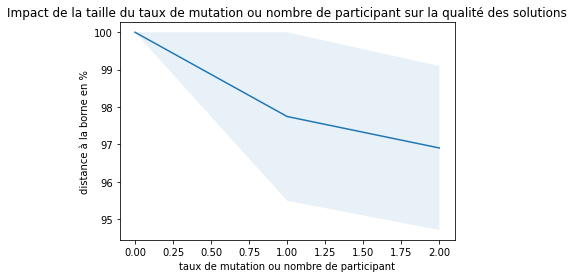

Le prochain graphique nous montre le temps de chaque algorithme selon le nombre de villes.
La courbe nous montre que plus le nombre de villes est important plus le temps de calcul est élevé. Cette courbe est une fonction affine.

IntProgress(value=0, layout=Layout(width='100%'), max=3)

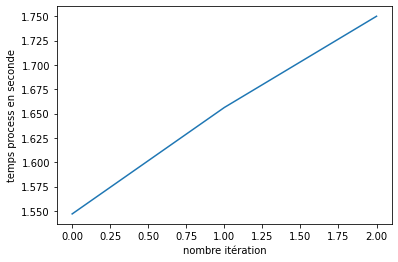

In [20]:
import time
import numpy as np
from collections import deque
from ipywidgets import IntProgress
from IPython.display import display

nb_iteration = 3
tab_temp = []
bar = IntProgress(min=0, max=nb_iteration, layout={"width" : "100%"})
display(bar)
for i in range(nb_iteration):
    start = time.process_time()
    AlgoGA(0,10*(i+1),0)
    stop = time.process_time()
    tab_temp.append(stop-start)
    bar.value += 1

bar.close()

from matplotlib import pyplot as plt
plt.xlabel("nombre itération")
plt.ylabel("temps process en seconde")
plt.plot(tab_temp)
plt.show()

Le prochain graphique nous montre le temps de chaque algorithme selon la taille de la population initiale et du nombre d'évolution. La courbe nous montre que plus la taille des paramètres est important plus le temps de calcul est élevé. 

IntProgress(value=0, layout=Layout(width='100%'), max=10)

IntProgress(value=0, layout=Layout(width='100%'), max=10)

IntProgress(value=0, layout=Layout(width='100%'), max=20)

IntProgress(value=0, layout=Layout(width='100%'), max=30)

IntProgress(value=0, layout=Layout(width='100%'), max=40)

IntProgress(value=0, layout=Layout(width='100%'), max=50)

IntProgress(value=0, layout=Layout(width='100%'), max=60)

IntProgress(value=0, layout=Layout(width='100%'), max=70)

IntProgress(value=0, layout=Layout(width='100%'), max=80)

IntProgress(value=0, layout=Layout(width='100%'), max=90)

IntProgress(value=0, layout=Layout(width='100%'))

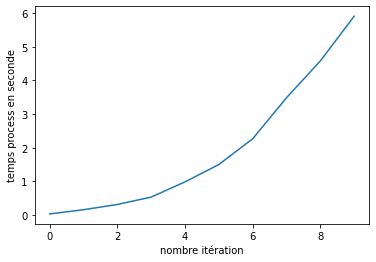

In [21]:
import time
import numpy as np
from collections import deque
from ipywidgets import IntProgress
from IPython.display import display

nb_iteration = 10
tab_temp = []
bar = IntProgress(min=0, max=nb_iteration, layout={"width" : "100%"})
display(bar)
for i in range(nb_iteration):
    start = time.process_time()
    # taille de l'évolution de la pop et la pop
    etude5(1*(i+1),10,1,1,1)
    stop = time.process_time()
    tab_temp.append(stop-start)
    bar.value += 1

bar.close()

from matplotlib import pyplot as plt
plt.xlabel("nombre itération")
plt.ylabel("temps process en seconde")
plt.plot(tab_temp)
plt.show()

Le prochain graphique nous montre le temps de chaque algorithme selon le taux de mutation de la population ou la taille des participants du tournoi. La courbe nous montre que plus la taille des paramètres est important plus le temps de calcul est élevé. 

IntProgress(value=0, layout=Layout(width='100%'), max=10)

IntProgress(value=0, layout=Layout(width='100%'), max=10)

IntProgress(value=0, layout=Layout(width='100%'), max=20)

IntProgress(value=0, layout=Layout(width='100%'), max=30)

IntProgress(value=0, layout=Layout(width='100%'), max=40)

IntProgress(value=0, layout=Layout(width='100%'), max=50)

IntProgress(value=0, layout=Layout(width='100%'), max=60)

IntProgress(value=0, layout=Layout(width='100%'), max=70)

IntProgress(value=0, layout=Layout(width='100%'), max=80)

IntProgress(value=0, layout=Layout(width='100%'), max=90)

IntProgress(value=0, layout=Layout(width='100%'))

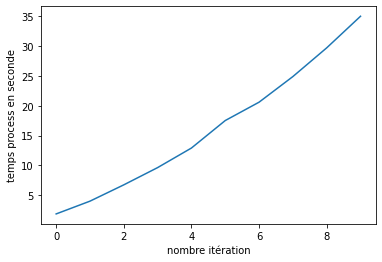

In [22]:
import time
import numpy as np
from collections import deque
from ipywidgets import IntProgress
from IPython.display import display

nb_iteration = 10
tab_temp = []
bar = IntProgress(min=0, max=nb_iteration, layout={"width" : "100%"})
display(bar)
for i in range(nb_iteration):
    start = time.process_time()
    # mutation + tournoi
    etude7(1*(i+1),10,1,1,0,1)
    stop = time.process_time()
    tab_temp.append(stop-start)
    bar.value += 1

bar.close()

from matplotlib import pyplot as plt
plt.xlabel("nombre itération")
plt.ylabel("temps process en seconde")
plt.plot(tab_temp)
plt.show()

## Pistes d'améliorations

Afin de rendre nos algorithmes plus pertinents, nous comptons à terme implémenter différentes fonctionnalités :
- Une de coût, introduit par le prix des péages, de l’essence et de l’entretien des véhicules (rapportés à la journée)
- Une de stockage, permettant d’optimiser la place dans un camion afin d’exploiter au mieux les ressources spatiales.
- Une de choix du nombre de véhicules, afin d’optimiser le nombre de camions faisant les livraisons en prenant en compte, la taille des objets livrés, le coût de livraison d’un camion.
- Une dimension de journée, permettant de réaliser une étude sur plusieurs jours.

## Conclusion

Pour conclure, notre algorithme répond à nos contraintes imposées, tout en ayant un temps de réponses correspondant aux types d'algorithme génétiques (~96%) , cependant des pistes d'améliorations peuvent amenées notre algorithme à se rapprocher un peu plus de la réalité, (taille des camions, essences). 

## Source et références :

Afin de nous aider à résoudre notre problème de décisions et d'optimisations, nous nous sommes inspirés de divers travaux scientifiques existants.

https://developers.google.com/optimization/routing/vrptw : ce lien nous donne un exemple de résolution détaillé pour le problème vrptw (Vehicule Routing Problem With Time Windows). 

https://developers.google.com/optimization/routing/vrp : venant du meme site, ce lien nous donne une vue plus générale sur le problème vrp (Vehicule Routing Problem).

https://vrpy.readthedocs.io/en/latest/ : Cette librairie a été concue pour résoudre des problèmes vrp sur python.

https://math.unice.fr/~pauly/Little.pdf : Ce lien nous présente l'agorithme de little qui possède une complexité temporelle exponentielle en n.

https://www.datavis.fr/playing/salesman-problem : Ce lien nous présente le problème du voyageur de commerce.

https://mpsib-camille-guerin.pagesperso-orange.fr/Python/Dijkstra/dijkstra.pdf : Ce lien nous présente l'agorithme de Dijkstra qui est glouton.

https://univ.scholarvox.com/reader/docid/88919478/page/1 : Ce lien nous présente la recherche opérationnelle dans son ensemble. Le livre aborde plusieurs sujet clés tels que la complexité, la théorie des graphes, l'application des graphes a la recherche opérationnelle ainsi que les processus stochastiques et la programmation dynamique stochastique.

https://univ.scholarvox.com/reader/docid/88853626/page/1 : Ce lien nous présente la complexité de différents problèmes comparé a l'efficacité des algorithmes les résolvants. ce livre détailles ensuite différents problèmes classiques de théorie des graphes et expose leurs résolutions. Il traite également de la programmation dynamique et des méthodes de résolutions approximatives.